# SST Group Summer Minicourse 2020
## Meeting 3: conda, python, numpy, and pytorch intro

In [2]:
import numpy as np

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 90, 2, 100, 9
print('There are %d tokens, the network layer sizes are (%d,%d,%d)'%(N,D_in,H,D_out))


There are 90 tokens, the network layer sizes are (2,100,9)


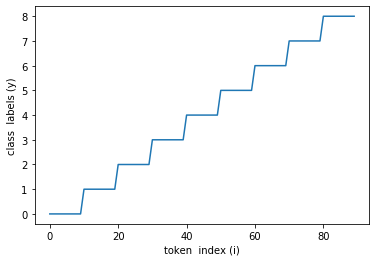

In [3]:
class_labels = np.array([ int(n/10) for n in range(N)], dtype='int')
import matplotlib.pyplot as plt
plt.plot(class_labels)
plt.ylabel('class  labels (y)')
plt.xlabel('token  index (i)')
plt.savefig('class_labels.png')

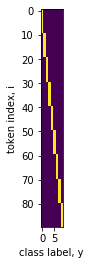

In [4]:
y_onehot = np.zeros((N, D_out))
for i in range(N):
    y_onehot[i,class_labels[i]]=1
plt.imshow(y_onehot)
plt.xlabel('class label, y')
plt.ylabel('token index, i')
plt.savefig('onehot.png')

(90, 2)


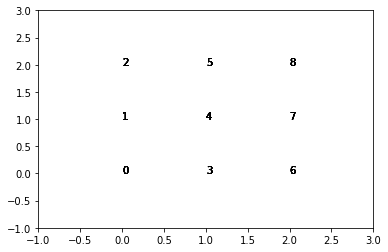

In [5]:
mean_vectors = np.array( [[int(y/3), y-3*int(y/3)] for y in class_labels ])
print(mean_vectors.shape)
ax=plt.subplot(111, xlim=[-1,3], ylim=[-1,3])
for i in range(N):
  plt.text(mean_vectors[i,0], mean_vectors[i,1], '%d'%(class_labels[i]))
plt.savefig('mean_vectors.png')

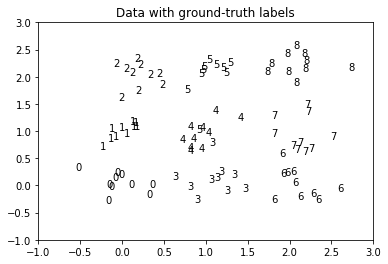

In [6]:
data = np.random.normal(loc=mean_vectors, scale=0.25, size=(90,2))
ax=plt.subplot(111,xlim=[-1,3],ylim=[-1,3])
for i in range(N):
    plt.text(data[i,0],data[i,1],'%d'%class_labels[i])
plt.title('Data with ground-truth labels')
plt.savefig('data.png')

In [7]:
w1 = np.random.normal(loc=0.0, scale=0.1, size=(D_in, H)) 
b1 = np.random.normal(loc=0.0, scale=0.1, size=(1,H))
w2 = np.random.normal(loc=0.0, scale=0.1, size=(H, D_out))
b2 = np.random.normal(loc=0.0, scale=0.1, size=(1, D_out))
learning_rate = 0.001
print('w1 has shape %s, w2 has shape %s'%(w1.shape, w2.shape))
print('learning rate is %g'%(learning_rate))


w1 has shape (2, 100), w2 has shape (100, 9)
learning rate is 0.001


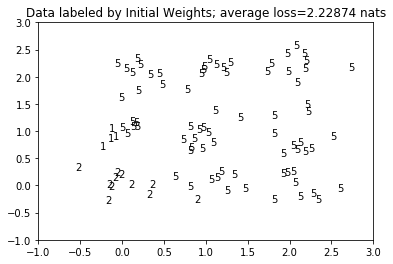

In [8]:
def forward_pass(x, w1, b1, w2, b2):
    N, D_in = x.shape
    h_excitation = np.dot(x,w1)+b1
    h_activation = np.maximum(0,h_excitation)
    y_excitation = np.dot(h_activation, w2)+b2
    y_numerator = np.exp(y_excitation)
    y_activation = y_numerator / np.sum(y_numerator,axis=1).reshape((N,1))
    return(y_activation, y_excitation, h_activation, h_excitation)

(ya,ye,ha,he)=forward_pass(data,w1,b1,w2,b2)
ax=plt.subplot(111,xlim=[-1,3],ylim=[-1,3])
for i in range(N):
    plt.text(data[i,0],data[i,1],'%d'%np.argmax(ya[i,:]))
    
loss = -np.average(np.log(np.choose(class_labels, np.transpose(ya))))
plt.title('Data labeled by Initial Weights; average loss=%g nats'%(loss))
plt.savefig('network_output_initial.png')

In [9]:
def training_iter(x,y_onehot,w1,b1,w2,b2,learning_rate):
    (ya,ye,ha,he)=forward_pass(x,w1,b1,w2,b2)
    ye_deriv = ya - y_onehot
    ha_deriv = np.dot(ye_deriv, np.transpose(w2))
    he_deriv = ha_deriv * np.heaviside(he,0.5)
    db2 = np.sum(ye_deriv, axis=0)
    dw2 = np.dot(np.transpose(ha),ye_deriv)
    db1 = np.sum(he_deriv, axis=0)
    dw1 = np.dot(np.transpose(x),he_deriv)
    new_b2 = b2 - learning_rate*db2
    new_w2 = w2 - learning_rate*dw2
    new_b1 = b1 - learning_rate*db1
    new_w1 = w1 - learning_rate*dw1
    return(new_w1,new_b1,new_w2,new_b2)

nw1,nb1,nw2,nb2 = training_iter(data, y_onehot, w1, b1,w2, b2,learning_rate)
print('w1 average change is %g'%(np.average(np.absolute(w1-nw1))))
print('b1 average change is %g'%(np.average(np.absolute(b1-nb1))))
print('w2 average change is %g'%(np.average(np.absolute(w2-nw2))))
print('b2 average change is %g'%(np.average(np.absolute(b2-nb2))))

w1 average change is 0.00127499
b1 average change is 0.000716939
w2 average change is 0.000513409
b2 average change is 0.00109143


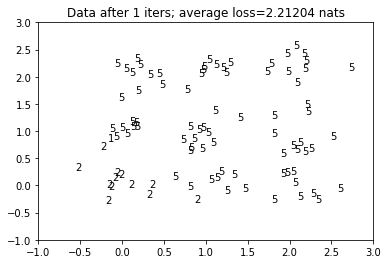

In [10]:
def visualize_and_score(x,y,class_labels,iternum):
    N,D = x.shape
    ax=plt.subplot(111,xlim=[-1,3],ylim=[-1,3])
    for i in range(N):
        plt.text(x[i,0],x[i,1],'%d'%np.argmax(y[i,:]))
    loss = -np.average(np.log(np.choose(class_labels, np.transpose(y))))
    plt.title('Data after %d iters; average loss=%g nats'%(iternum,loss))

(ya,ye,ha,he)=forward_pass(data,nw1,nb1,nw2,nb2)
visualize_and_score(data,ya,class_labels,1)
plt.savefig('iter1.png')

In [11]:
for iternum in range(500):
    (w1,b1,w2,b2)=training_iter(data,y_onehot,w1,b1,w2,b2,learning_rate)
    (ya,ye,ha,he)=forward_pass(data,w1,b1,w2,b2)
    loss = -np.average(np.log(np.choose(class_labels, np.transpose(ya))))
    if iternum % 50 == 0:
        print('Iter %d: average loss=%g nats'%(iternum,loss))
    

Iter 0: average loss=2.21204 nats
Iter 50: average loss=1.67105 nats
Iter 100: average loss=1.27368 nats
Iter 150: average loss=0.988522 nats
Iter 200: average loss=0.773614 nats
Iter 250: average loss=0.616291 nats
Iter 300: average loss=0.50345 nats
Iter 350: average loss=0.422704 nats
Iter 400: average loss=0.364459 nats
Iter 450: average loss=0.321658 nats


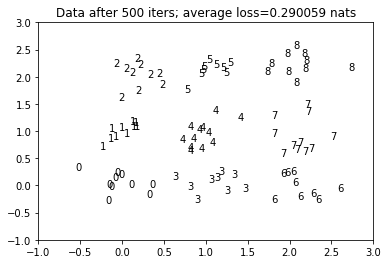

In [12]:
(ya,ye,ha,he)=forward_pass(data,w1,b1,w2,b2)
visualize_and_score(data,ya,class_labels,500)
plt.savefig('iter500.png')


In [13]:
import torch
dtype = torch.float
device = torch.device("cpu")
N, D_in, H, D_out = 90, 2, 100, 9
print('There are %d tokens, the network layer sizes are (%d,%d,%d)'%(N,D_in,H,D_out))


There are 90 tokens, the network layer sizes are (2,100,9)


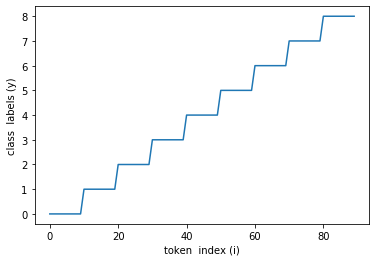

In [14]:
class_labels = torch.tensor([ int(n/10) for n in range(N)], dtype=torch.int, device=device)
import matplotlib.pyplot as plt
plt.plot(class_labels)
plt.ylabel('class  labels (y)')
plt.xlabel('token  index (i)')
plt.savefig('class_labels.png')


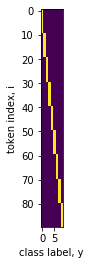

In [15]:
y_onehot = torch.zeros((N, D_out), dtype=dtype, device=device)
for i in range(N):
    y_onehot[i,class_labels[i]]=1
plt.imshow(y_onehot)
plt.xlabel('class label, y')
plt.ylabel('token index, i')
plt.savefig('onehot.png')


torch.Size([90, 2])


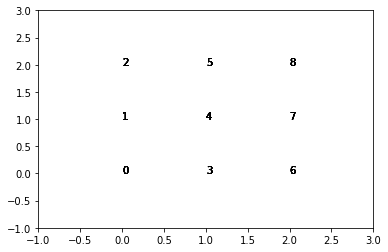

In [16]:
mean_vectors = torch.tensor( [[int(y//3), y-3*int(y//3)] for y in class_labels ], dtype=dtype, device=device)
print(mean_vectors.shape)

ax=plt.subplot(111, xlim=[-1,3], ylim=[-1,3])
for i in range(N):
  plt.text(mean_vectors[i,0], mean_vectors[i,1], '%d'%(class_labels[i]))
plt.savefig('mean_vectors.png')


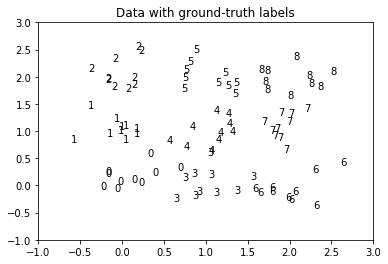

In [17]:
stdev = torch.ones((N,D_in),dtype=dtype,device=device)*0.25
data = torch.distributions.Normal(loc=mean_vectors,scale=stdev).sample()
ax=plt.subplot(111,xlim=[-1,3],ylim=[-1,3])
for i in range(N):
    plt.text(data[i,0],data[i,1],'%d'%class_labels[i])
plt.title('Data with ground-truth labels')
plt.savefig('data.png')


In [18]:
w1 = torch.randn(D_in, H, dtype=dtype, device=device)*0.1 
b1 = torch.randn(1,H, dtype=dtype, device=device)*0.1
w2 = torch.randn(H, D_out, dtype=dtype, device=device)*0.1
b2 = torch.randn(1, D_out, dtype=dtype, device=device)*0.1
learning_rate = 0.001
print('w1 has shape %s, w2 has shape %s'%(w1.shape, w2.shape))
print('learning rate is %g'%(learning_rate))


w1 has shape torch.Size([2, 100]), w2 has shape torch.Size([100, 9])
learning rate is 0.001


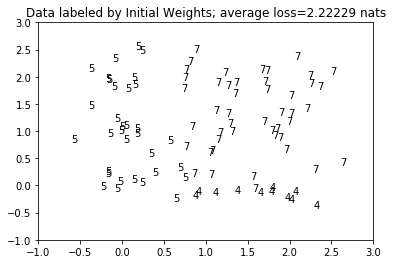

In [19]:
def forward_pass(x, w1, b1, w2, b2):
    N, D_in = x.shape
    h_excitation = x.mm(w1)+b1
    h_activation = h_excitation.clamp(min=0)
    y_excitation = h_activation.mm(w2)+b2
    y_numerator = torch.exp(y_excitation)
    y_activation = y_numerator / y_numerator.sum(dim=1,keepdim=True)
    return(y_activation, y_excitation, h_activation, h_excitation)

(ya,ye,ha,he)=forward_pass(data,w1,b1,w2,b2)
ax=plt.subplot(111,xlim=[-1,3],ylim=[-1,3])
for i in range(N):
    plt.text(data[i,0],data[i,1],'%d'%torch.argmax(ya[i,:]))
    
loss = -np.average(np.log(np.choose(class_labels.numpy(), ya.numpy().T)))
plt.title('Data labeled by Initial Weights; average loss=%g nats'%(loss))
plt.savefig('network_output_initial.png')


In [20]:
def training_iter(x,y_onehot,w1,b1,w2,b2,learning_rate):
    (ya,ye,ha,he)=forward_pass(x,w1,b1,w2,b2)
    ye_deriv = ya - y_onehot
    ha_deriv = ye_deriv.mm(w2.t())
    he_deriv = ha_deriv.clone()
    he_deriv[he < 0] = 0
    db2 = torch.sum(ye_deriv, dim=0)
    dw2 = ha.t().mm(ye_deriv)
    db1 = torch.sum(he_deriv, dim=0)
    dw1 = x.t().mm(he_deriv)
    new_b2 = b2 - learning_rate*db2
    new_w2 = w2 - learning_rate*dw2
    new_b1 = b1 - learning_rate*db1
    new_w1 = w1 - learning_rate*dw1
    return(new_w1,new_b1,new_w2,new_b2)

nw1,nb1,nw2,nb2 = training_iter(data, y_onehot, w1, b1,w2, b2,learning_rate)
print('w1 average change is %g'%(torch.mean(torch.abs(w1-nw1))))
print('b1 average change is %g'%(torch.mean(torch.abs(b1-nb1))))
print('w2 average change is %g'%(torch.mean(torch.abs(w2-nw2))))
print('b2 average change is %g'%(torch.mean(torch.abs(b2-nb2))))

w1 average change is 0.00103989
b1 average change is 0.000492372
w2 average change is 0.000449555
b2 average change is 0.00157276


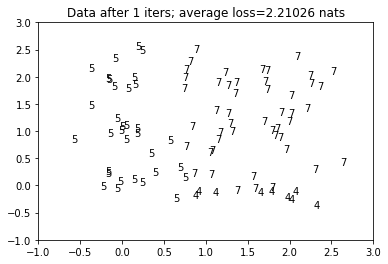

In [21]:
def visualize_and_score(x,y,class_labels,iternum):
    N,D = x.shape
    ax=plt.subplot(111,xlim=[-1,3],ylim=[-1,3])
    for i in range(N):
        plt.text(x[i,0],x[i,1],'%d'%torch.argmax(y[i,:]))
    loss = -np.average(np.log(np.choose(class_labels.numpy(), y.numpy().T)))
    plt.title('Data after %d iters; average loss=%g nats'%(iternum,loss))

(ya,ye,ha,he)=forward_pass(data,nw1,nb1,nw2,nb2)
visualize_and_score(data,ya,class_labels,1)
plt.savefig('iter1.png')

                 

Iter 0: average loss=2.21026 nats
Iter 50: average loss=1.71065 nats
Iter 100: average loss=1.29378 nats
Iter 150: average loss=1.0021 nats
Iter 200: average loss=0.794108 nats
Iter 250: average loss=0.643745 nats
Iter 300: average loss=0.53251 nats
Iter 350: average loss=0.448989 nats
Iter 400: average loss=0.385509 nats
Iter 450: average loss=0.336539 nats


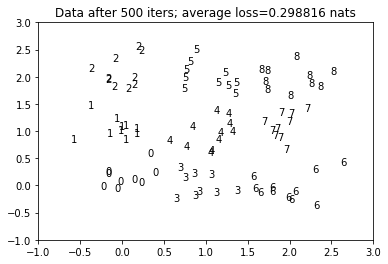

In [22]:
for iternum in range(500):
    (w1,b1,w2,b2)=training_iter(data,y_onehot,w1,b1,w2,b2,learning_rate)
    (ya,ye,ha,he)=forward_pass(data,w1,b1,w2,b2)
    loss = -np.average(np.log(np.choose(class_labels.numpy(), ya.numpy().T)))
    if iternum % 50 == 0:
        print('Iter %d: average loss=%g nats'%(iternum,loss))

(ya,ye,ha,he)=forward_pass(data,w1,b1,w2,b2)
visualize_and_score(data,ya,class_labels,500)
plt.savefig('iter500.png')
